# **MADDPG training on Tennis**

In [1]:
import numpy as np
import pickle
from collections import deque
from unityagents import UnityEnvironment
from matplotlib import pyplot as plt

from maddpg.multi_agent import MultiAgent
from utils.utils import save_agent
from train import train

## 1. Training and agent configurations

In [2]:
# env_filepath = 'examples/tennis/Tennis_Linux_NoVis/Tennis.x86_64'
env_filepath = 'examples/tennis/Tennis.app'

solving_score = 0.5

train_config = {
    # Training loop
    'n_episodes': 2000,
    'max_t': 100000,
    'mini_batch_size': 512,
    'update_every': 2,
    
    # Optimizers
    'actor_optim_params': {
        'lr': 0.001
    },
    'critic_optim_params': {
        'lr': 0.001
    },

    # noise
    'ou_noise_start': 2.0,
    'ou_noise_decay_rate': 0.998,
    
    # maddpg
    'soft_update_tau': 0.01,
    'discount_gamma': 0.95,

    # Replay memory
    'buffer_size': 1000000
}

## 2. Training

In [3]:
env = UnityEnvironment(file_name=env_filepath)

multi_agent, all_train_scores, solved_epi = train(
    environment=env,
    train_config=train_config,
    agent_config=None,
    print_every=100,
    solving_score=solving_score,
    random_seed=0
)

env.close()

output_dict = {
    'all_train_scores': all_train_scores,
    'solved_epi': solved_epi
}
pickle.dump(output_dict, open('tennis_train_results.pkl', 'wb'))


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Episode 100	Average Training Score: 0.006
Episode 200	Average Training Score: 0.004
Episode 300	Average Training Score: 0.022
Episode 400	Average Training Score: 0.031
Episode 500	Average Training Score: 0.038
Episode 600	Average Training Score: 0.094
Episode 700	Average Training Score: 0.185
Episode 800	Average Training Score: 0.272
Episode 893	Average Training Score: 0.505
Environment solved in 893 episodes!	Average Training Score: 0.505
Episode 900	Average Training Score: 0.506
Episode 1000	Average Training Score: 1.506
Episode 1100	Average Training Score: 1.613
Episode 1200	Average Training Score: 0.973
Episode 1300	Average Training Score: 1.806
Episode 1400	Average Training Score: 1.399
Episode 1500	Average Training Score: 1.723
Episode 1600	Average Training Score: 1.184
Episode 1700	Average Training Score: 1.604
Episode 1800	Average Training Score: 1.835
Episode 1900	Average Training Score: 1.502
Episode 2000	Average Training Score: 1.586


## 3. Training score plot

Text(0.5,0,'episode')

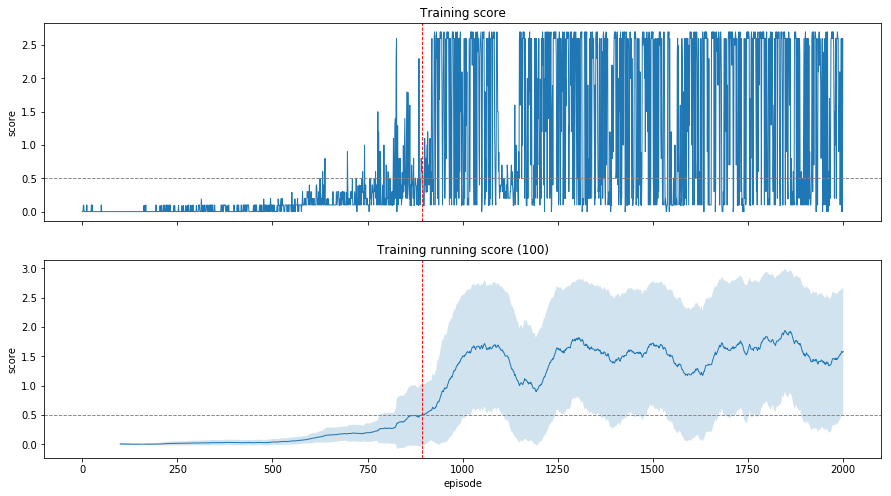

In [5]:
def running_stats(x, N):
    rolls = np.asarray([x[i:(i+N)] for i in range(len(x) - N + 1)])
    running_means = np.mean(rolls, axis=1)
    running_stds = np.std(rolls, axis=1)
    return running_means, running_stds

_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# training score plot 
ax1.plot(np.arange(len(all_train_scores)), all_train_scores, lw=1, alpha=1.0)
ax1.axvline(x=solved_epi, linestyle='--', color='red', linewidth=0.9)
ax1.axhline(y=solving_score, linestyle='--', color='gray', linewidth=0.9)
ax1.set_title('Training score')
ax1.set_ylabel('score')

# running statistics plot 
win_size = 100
running_means, running_stds = running_stats(all_train_scores, win_size)
episodes = np.arange(len(running_means)) + win_size

ax2.plot(episodes, running_means, lw=1, alpha=1.0)
ax2.fill_between(episodes, running_means - running_stds, running_means + running_stds, alpha=0.2)
ax2.axvline(x=solved_epi, linestyle='--', color='red', linewidth=0.9)
ax2.axhline(y=solving_score, linestyle='--', color='gray', linewidth=0.9)
ax2.set_title('Training running score (%s)' % win_size)
ax2.set_ylabel('score')
ax2.set_xlabel('episode')
    

## 4. Discussions

1. The **MADDPG** is able to solve the environment with an average score over **0.5** in **893** episodes. 
2. To evaluate the learning stability, the training is continued up to **2000** episodes. 
   - It shows that the agent continues learning after episode **893**. 
   - In the remaining episodes, it shows some performance fluctuation but it's able to maintain the average score mostly above **1.5**.


## 5. Future work

1. Have a better hyperparameter tuning and experiment with different actor-critic network models. 
  - The training process is very sensitive to hyperparameters such as random seed, learning rate and etc. 
2. Compare the performance of **MADDPG** with single agent methods such as **DDPG** and **PPO**. 
3. Experiment **MADDPG** with a more difficult **`Soccer`** environment. 
  - The project structure is modular. A new multi-agent environment can be trained by adding a new **`config.yaml`** file. 
